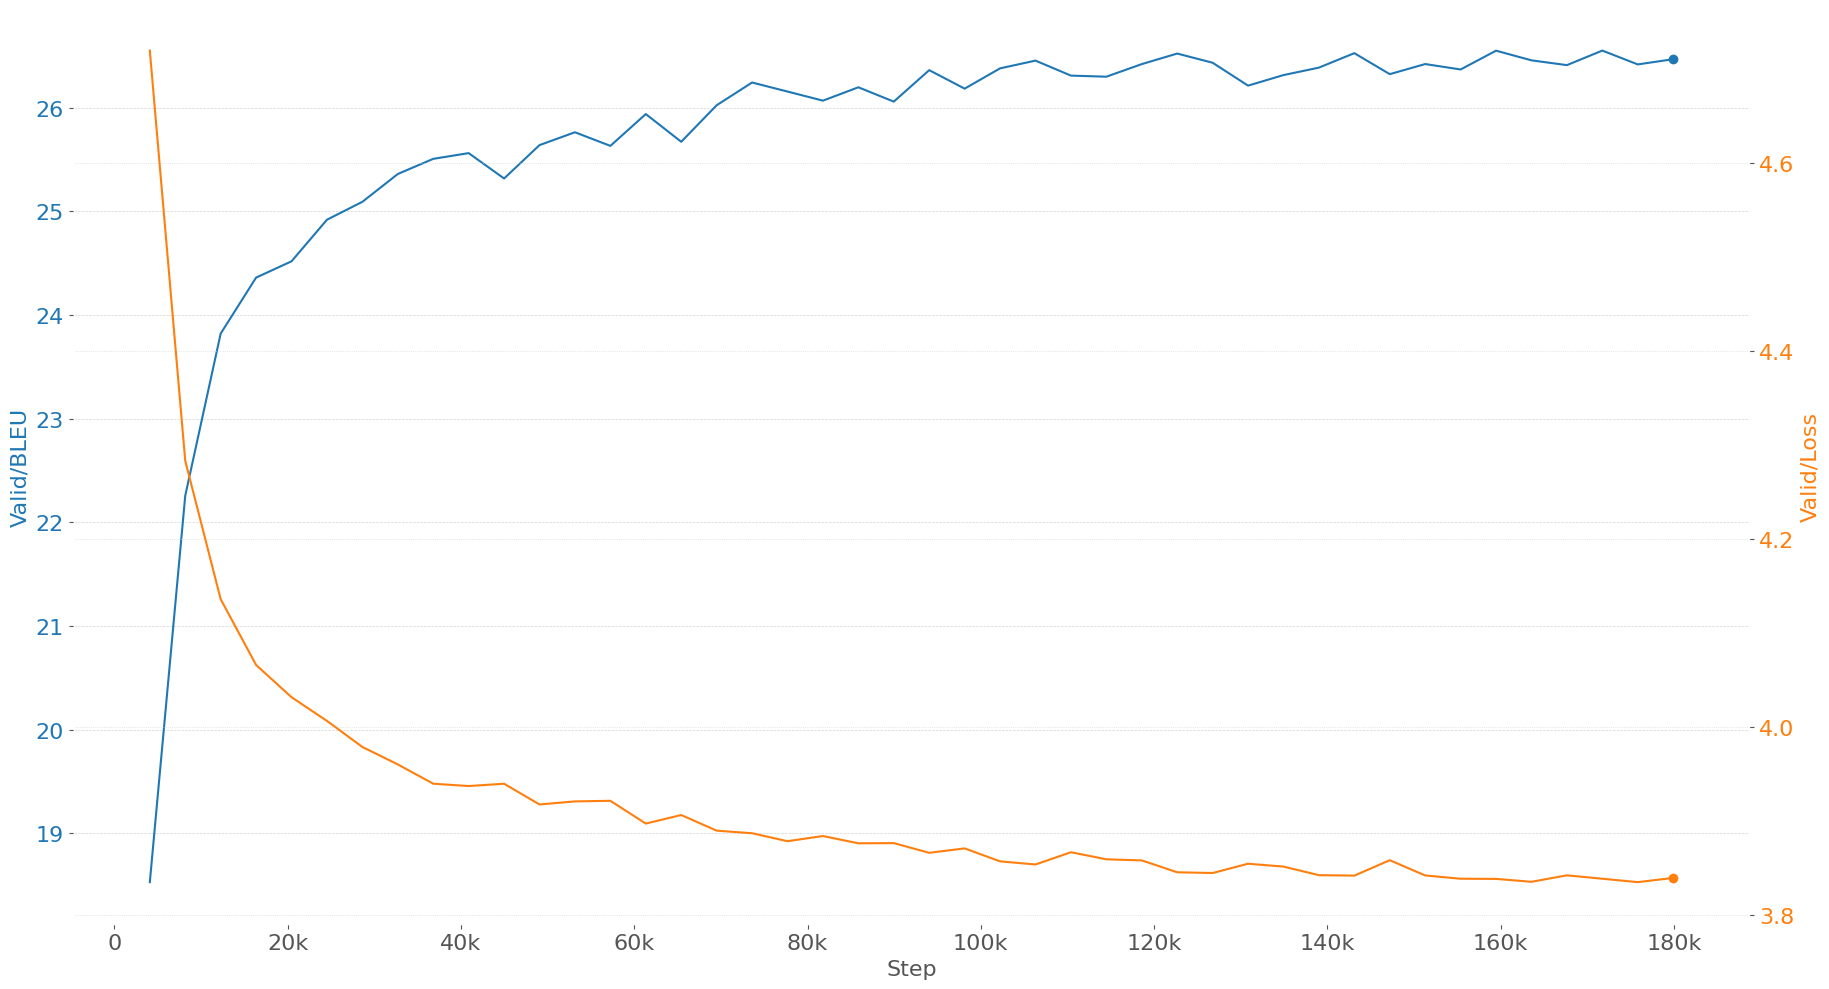

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

# plt.rcParams.update({'font.size': 16})

# 加载数据
df_bleu = pd.read_csv('wandb_export_2024-01-10T03_33_27.155+02_00.csv')  # 替换为你的 valid/bleu CSV 文件路径
df_loss = pd.read_csv('wandb_export_2024-01-10T03_33_33.612+02_00.csv')  # 替换为你的 valid/loss CSV 文件路径

# 确保步骤列的数据类型相同
df_bleu['Step'] = df_bleu['Step'].astype(int)
df_loss['Step'] = df_loss['Step'].astype(int)

# 合并数据框
df = pd.merge(df_bleu, df_loss, on='Step', how='outer')

# 设置 wandb 风格颜色
wandb_blue = "#1f77b4"
wandb_orange = "#ff7f0e"

# 创建图表
fig, ax1 = plt.subplots(figsize=(18.4, 10))

# 设置图表底色为白色
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# 自定义函数将步骤值转换为 'xxk' 格式
def format_func(value, tick_number):
    return f'{int(value/1000)}k' if value >= 1000 else int(value)

# 设置 x 轴的格式
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(format_func), )


# 只绘制水平网格线
ax1.yaxis.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
ax1.xaxis.grid(False)


# 设置图表风格
plt.style.use('ggplot')

# 绘制 valid/bleu
ax1.set_xlabel('Step', fontsize=16)
ax1.set_ylabel('Valid/BLEU', color=wandb_blue, fontsize=16)
ax1.plot(df['Step'], df['transformer_bt - valid/bleu'], color=wandb_blue)
ax1.tick_params(axis='y', labelcolor=wandb_blue, labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
# 添加圆点于折线末端
ax1.plot(df['Step'].iloc[-1], df['transformer_bt - valid/bleu'].iloc[-1], color=wandb_blue, marker='o', markersize=6)


# 实例化第二个 Y 轴用于 valid/loss
ax2 = ax1.twinx()

ax2.yaxis.grid(True, color='lightgray', linestyle=':', linewidth=0.5)
ax2.xaxis.grid(False)

ax2.set_ylabel('Valid/Loss', color=wandb_orange, fontsize=16)
ax2.plot(df['Step'], df['transformer_bt - valid/loss'], color=wandb_orange)
ax2.tick_params(axis='y', labelcolor=wandb_orange, labelsize=16)

# 添加圆点于折线末端
ax2.plot(df['Step'].iloc[-1], df['transformer_bt - valid/loss'].iloc[-1], color=wandb_orange, marker='o', markersize=6)

# 调整布局并显示图表
fig.tight_layout()
plt.show()